In [61]:
!pip install networkx

You should consider upgrading via the '/runai-ivrl-scratch/students/2021-fall-sp-jellouli/anaconda3/envs/jellouli-env/bin/python -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

In [94]:
import pickle
from detectron2.data import MetadataCatalog
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [95]:
r_m_path = "../data/relationship_matrices/COCO_graph_r.pkl"
a_m_path = "../data/relationship_matrices/COCO_graph_a.pkl"

<IPython.core.display.Javascript object>

In [96]:
with open(r_m_path, "rb") as handle:
    r_m = pickle.load(handle)

<IPython.core.display.Javascript object>

In [97]:
with open(a_m_path, "rb") as handle:
    a_m = pickle.load(handle)

<IPython.core.display.Javascript object>

In [98]:
coco_2017_metadata = MetadataCatalog["coco_2017_train"]

<IPython.core.display.Javascript object>

In [99]:
classes = ["background"] + coco_2017_metadata.thing_classes

<IPython.core.display.Javascript object>

In [100]:
r_m = (r_m - r_m.min()) / (r_m.max() - r_m.min())

<IPython.core.display.Javascript object>

In [101]:
plt.rcParams.update(
    {
        "font.size": 10,
        "xtick.labelsize": 6,
        "ytick.labelsize": 6,
    }
)

<IPython.core.display.Javascript object>

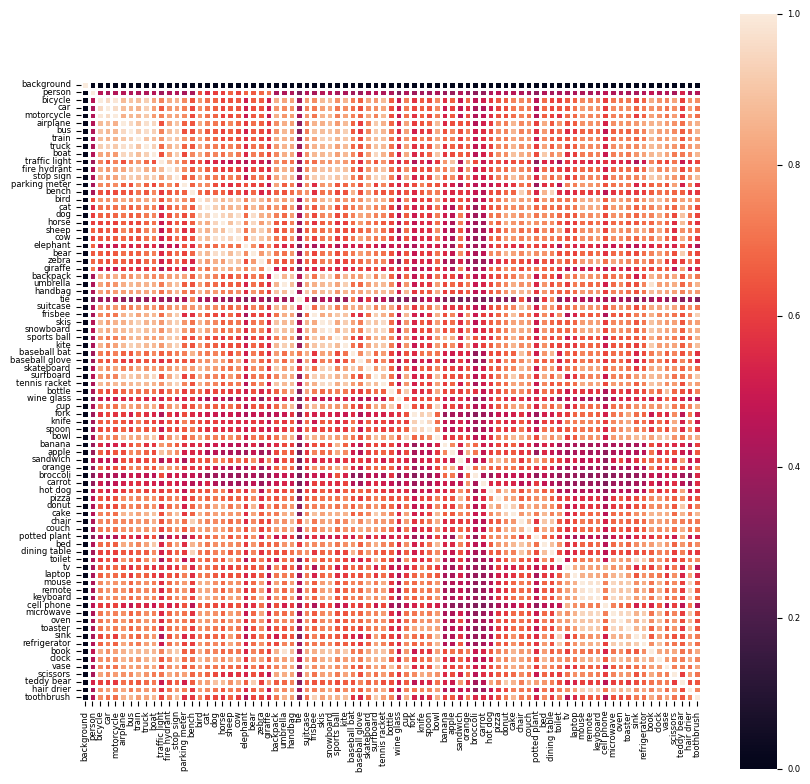

<IPython.core.display.Javascript object>

In [102]:
plt.figure(figsize=(10, 10), dpi=100)
sns.heatmap(a_m, xticklabels=classes, yticklabels=classes, square=True, linewidths=1)
plt.savefig("attribute.jpg")

In [103]:
a_m[range(81), range(81)] = -1

<IPython.core.display.Javascript object>

In [150]:
graph = networkx.DiGraph()


<IPython.core.display.Javascript object>

In [148]:
graph.add_nodes_from(classes)

<IPython.core.display.Javascript object>

In [151]:
for i, max_i in enumerate(a_m.argmax(axis=1)):
    graph.add_edge(classes[i], classes[max_i])
#     print(classes[i])

<IPython.core.display.Javascript object>

In [143]:
import networkx as nx

<IPython.core.display.Javascript object>

In [144]:
from networkx.drawing.nx_pylab import draw_networkx

<IPython.core.display.Javascript object>

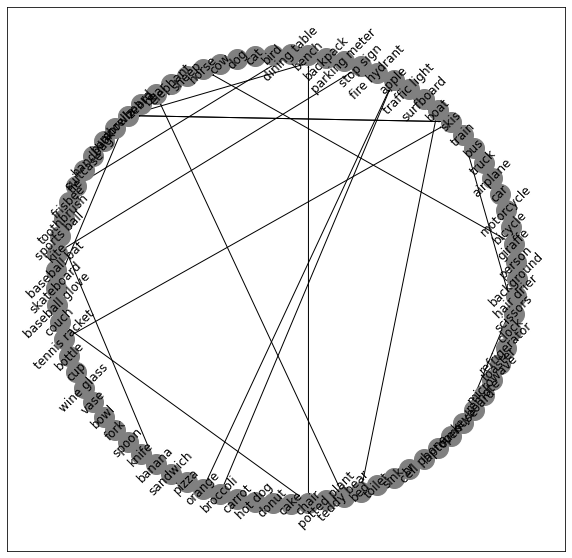

<IPython.core.display.Javascript object>

In [157]:
plt.figure(figsize=(10, 10))
# nx.draw_circular(
#     graph,
#     #     pos=nx.circular_layout(graph, range(len(graph.nodes))),
# #     with_labels=True,

# )
pos = nx.circular_layout(graph)

nx.draw_networkx(
    graph,
    pos,
    with_labels=False,
    arrowsize=2,
    node_size=400,
    node_color="grey",
    font_size=8,
    font_color="black",
)

text = nx.draw_networkx_labels(graph, pos)
for in, t in text.items():
    t.set_rotation(45)

plt.savefig("r_graph.jpg")